In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd  

# 1 Canopy

# 2 Fuzzy K-Means

# 3 K-Means
K-平均；使用误差平方和（Sum of the Squared Error，SSE）作为度量聚类质量的目标函数。
为了克服K-Means算法收敛于局部最小值的问题，提出了一种二分K-均值（bisecting K-means）

## 3.1 连续属性
Minkowski Distance: $\large{d_{ij}=\sqrt[p]{\sum_{k=1}^{n}{|x_{ik}-x_{jk}|^p}}}$ 其中p是一个变参数。当p=1时，就是曼哈顿距离; 当p=2时，就是欧氏距离; 当p→∞时，就是切比雪夫距离

Euclidean Distance: $\large{d_{ij}=\sqrt{\sum_{k=1}^{n}{|x_{ik}-x_{jk}|^2}}}$ ; 相似性: $\large{\frac{1}{(1+(Euclidean \  Distance))}}$

CityBlock Distance: $\large{d_{ij}=\sum_{k=1}^{n}{|x_{ik}-x_{jk}|}}$

Chebyshev Distance: $\large{d_{p,q}=max_{i}(|p_i-q_i|)}=lim_{k \to \infty}(\sum_{i=1}^{n}{|p_i-q_i|^k})^{1/k}$

Hamming Distance: 汉明距离(Hamming distance)，两个等长字符串s1与s2之间的汉明距离定义为将其中一个变为另外一个所需要作的最小替换次数。例如字符串“1111”与“1001”之间的汉明距离为2。

Cosine: 夹角余弦(Cosine) ，几何中夹角余弦可用来衡量两个向量方向的差异，机器学习中借用这一概念来衡量样本向量之间的差异。$cos(\theta)=\large{\frac{\overrightarrow{a}\cdot \overrightarrow{b}}{|\overrightarrow{a}||\overrightarrow{b}|}=\frac{\sum_{k=1}^{n}{x_{1k}x_{2k}}}{\sqrt{\sum_{k=1}^{n}{x_{1k}^2}} \sqrt{\sum_{k=1}^{n}{x_{2k}^2}}}}$

在二维空间中向量A(x1,y1)与向量B(x2,y2)的夹角余弦公式：$cos(\theta)=\large{\frac{x_1 x_2 + y_1 y_2}{\sqrt{x_1^2 + y_1^2} \sqrt{x_2^2 + y_2^2}}}$

Jaccard Similarity Coefficient: 杰卡德相似系数(Jaccard similarity coefficient) 两个集合A和B的交集元素在A，B的并集中所占的比例，称为两个集合的杰卡德相似系数，用符号J(A,B)表示。$J(A,B)=\large{\frac{|A \bigcap B|}{|A \bigcup B|}}$

Jaccard Distance: $J_{\delta}(A,B)=1-J(A,B)=\large{\frac{|A \bigcup B| - |A \bigcap B|}{|A \bigcup B|}}$

Pearson Correlation Coefficient: 皮尔逊系数(Pearson Correlation Coefficient)

Correlation Coefficient: $\rho_{XY}=\large{\frac{Cov(X,Y)}{\sqrt{D(X)}\sqrt{D(Y)}}=\frac{E((X-EX)(Y-EY))}{\sqrt{D(X)}\sqrt{D(Y)}}}$ (其中，E为数学期望或均值，D为方差，D开根号为标准差，$E\{[X-E(X)][Y-E(Y)]\}$称为随机变量X与Y的协方差，记为$Cov(X,Y)$，即$Cov(X,Y)=E\{[X-E(X)][Y-E(Y)]\}$，而两个变量之间的协方差和标准差的商则称为随机变量X与Y的相关系数)

相关距离的定义是：$D_{xy}=1-\rho_{XY}$

Pearson Correlation Coefficient: $\rho_{X,Y}=\large{\frac{cov(X,Y)}{\sigma_X \sigma_Y}=\frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}=\frac{E(XY)-E(X)E(Y)}{\sqrt{E(X^2)-E^2(X)} \sqrt{E(Y^2)-E^2(Y)}}}$

# 3.2 文档数据
余弦相似度(Cosine Similarity): 
$$cos(\theta)
=\frac{\sum_{i=1}^{n}{x_i \times y_i}}{\sqrt{\sum_{i=1}^{n}{(x_i)^2}} \times \sqrt{\sum_{i=1}^{n}{(y_i)^2}}}
=\frac{a \bullet b}{||a|| \times ||b||}
=\frac{(x_1, y_1)\bullet(x_2, y_2)}{\sqrt{x_1^2 + y_1^2} \times \sqrt{x_2^2 + y_2^2}}
=\frac{x_1x_2+y_1y_2}{\sqrt{x_1^2+y_1^2} \times \sqrt{x_2^2+y_2^2}}$$

In [2]:
#余弦相似度算法  
def CosSimilarity(UL,p1,p2):  
    si = GetSameItem(UL,p1,p2)  
    n = len(si)  
    if n == 0:  
        return 0  
  
    s = sum([UL[p1][item]*UL[p2][item] for item in si])  
    den1 = math.sqrt(sum([pow(UL[p1][item],2) for item in si]))  
    den2 = math.sqrt(sum([pow(UL[p2][itme],2) for item in si]))  
    return s/(den1*den2)  

## 3.3 标准化
min-max标准化(离差标准化): 是对原始数据的线性变换，使结果映射到[0,1]区间。
$$y_i=\frac{x_i-min\{ x_j \}}{max\{ x_j \} - min\{ x_j \}}$$

z-score标准化(标准差标准化): 
$$y_i=\frac{x_i - \overline{x}}{s}, \ 这里\ \overline{x}=\frac{1}{n}\sum_{i=1}^{n}{x_i},\ s=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}{(x_i - \overline{x})^2}}$$

归一化方法: 
$$y_i=\frac{x_i}{\sum_{i=1}^{n}{x_i}}$$

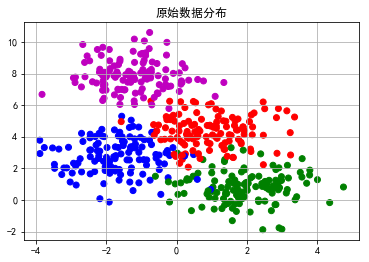

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors

#造数据
N = 500
centers = 4
data, y = ds.make_blobs(N, centers=centers, random_state=0)

#原始数据分布
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
cm = matplotlib.colors.ListedColormap(list('rgbm'))
plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
plt.title(u'原始数据分布')
plt.grid()
plt.show()

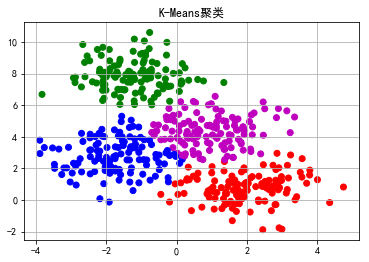

In [4]:
#K-Means
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, init='k-means++')
y_pre = model.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=y_pre, cmap=cm)
plt.title(u'K-Means聚类')
plt.grid()
plt.show()

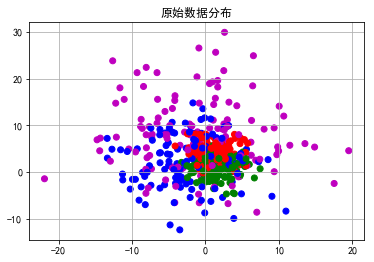

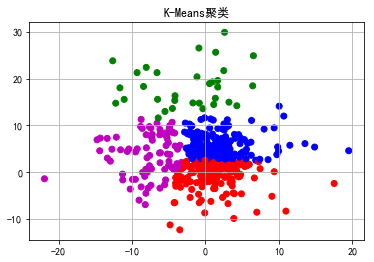

In [5]:
#K-Means有个先验条件，它是假设数据满足方差相同的高斯分布的，
#所以我们故意使这些数据的方差不同来看看聚类效果是否会大受影响

#方差不等数据
data2, y2 = ds.make_blobs(N, centers=centers, cluster_std=(2,2,5,8), random_state=0)
plt.scatter(data2[:, 0], data2[:, 1], c=y2, cmap=cm)
plt.title(u'原始数据分布')
plt.grid()
plt.show()

model2 = KMeans(n_clusters=4, init='k-means++')
y_pre2 = model2.fit_predict(data2)
plt.scatter(data2[:, 0], data2[:, 1], c=y_pre2, cmap=cm)
plt.title(u'K-Means聚类')
plt.grid()
plt.show()

(150, 4)


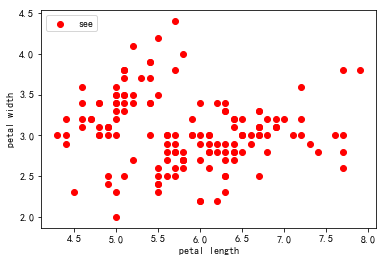

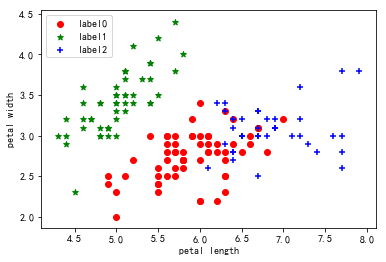

In [6]:
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import datasets 
 
iris = datasets.load_iris() 
X = iris.data[:, :4]  # #表示我们取特征空间中的4个维度
print(X.shape)
 
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()  
 
estimator = KMeans(n_clusters=3)  # 构造聚类器
estimator.fit(X)  # 聚类
label_pred = estimator.labels_  # 获取聚类标签
# 绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()  

# 4 K-MEDOIDS
http://www.cnblogs.com/feffery/tag/%E5%88%86%E7%B1%BB/

K-means聚类虽然快速高效，是大规模数据聚类分析中首选的方法，但是它也有一些短板，比如在数据集中有脏数据时，由于其对每一个类的准则函数为平方误差，当样本数据中出现了不合理的极端值，会导致最终聚类结果产生一定的误差，而K-medoids（中心点）聚类法在削弱异常值的影响上就有着其过人之处。

与K-means算法类似，区别在于中心点的选取，K-means中选取的中心点为当前类中所有点的重心，而K-medoids法选取的中心点为当前cluster中存在的一点，准则函数是当前cluster中所有其他点到该中心点的距离之和最小，这就在一定程度上削弱了异常值的影响，但缺点是计算较为复杂，耗费的计算机时间比K-means多。

具体的算法流程如下：

　　1.在总体n个样本点中任意选取k个点作为medoids

　　2.按照与medoids最近的原则，将剩余的n-k个点分配到当前最佳的medoids代表的类中

　　3.对于第i个类中除对应medoids点外的所有其他点，按顺序计算当其为新的medoids时，准则函数的值，遍历所有可能，选取准则函数最小时对应的点作为新的medoids

　　4.重复2-3的过程，直到所有的medoids点不再发生变化或已达到设定的最大迭代次数

　　5.产出最终确定的k个类

# 5 CLARANS

# 6 Hierarchical Clustering
Hierarchical Clustering 的想法很简单，主要分为两大类：agglomerative（自底向上）和 divisive（自顶向下）。首先说前者，自底向上，一开始，每个数据点各自为一个类别，然后每一次迭代选取距离最近的两个类别，把他们合并，直到最后只剩下一个类别为止，至此一棵树构造完成。

## 6.1 BIRCH

## 6.2 CURE

## 6.3 CHAMELEON

## 6.4 AGNES算法(自底向上)

各个簇的样本数目：
0    64
1    50
2    36
dtype: int64
聚类结果：
[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


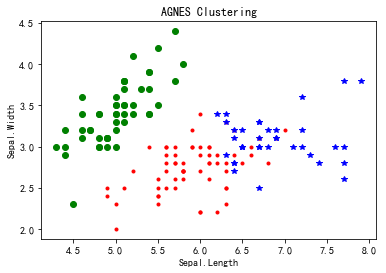

In [7]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
 
iris = datasets.load_iris()
irisdata = iris.data
 
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
 
res = clustering.fit(irisdata)
 
print ("各个簇的样本数目：")
print (pd.Series(clustering.labels_).value_counts())
print ("聚类结果：")
print (confusion_matrix(iris.target, clustering.labels_))
 
plt.figure()
d0 = irisdata[clustering.labels_ == 0]
plt.plot(d0[:, 0], d0[:, 1], 'r.')
d1 = irisdata[clustering.labels_ == 1]
plt.plot(d1[:, 0], d1[:, 1], 'go')
d2 = irisdata[clustering.labels_ == 2]
plt.plot(d2[:, 0], d2[:, 1], 'b*')
plt.xlabel("Sepal.Length")
plt.ylabel("Sepal.Width")
plt.title("AGNES Clustering")
plt.show()

# 7 基于密度的方法

## 7.1 DBSCAN

(150, 4)


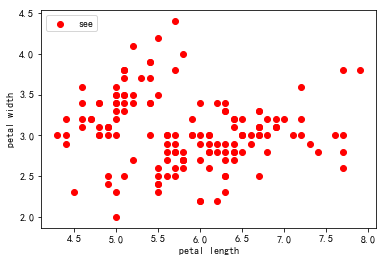

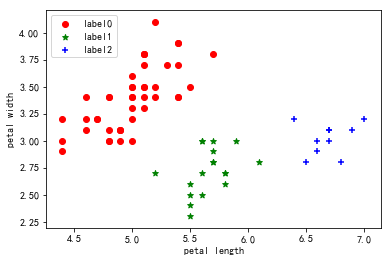

In [8]:
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import datasets 
from  sklearn.cluster import DBSCAN
 
iris = datasets.load_iris() 
X = iris.data[:, :4]  # #表示我们只取特征空间中的4个维度
print(X.shape)
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()  
 
dbscan = DBSCAN(eps=0.4, min_samples=9)
dbscan.fit(X) 
label_pred = dbscan.labels_
 
# 绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()  

## 7.2 DENCLUE

## 7.3 OPTICS

# 8 基于网格的方法

## 8.1 STING

## 8.2 CLIOUE

## 8.3 WAVE-CLUSTER

# 9 基于模型的方法

## 9.1 统计学方法

## 9.2 神经网络方法

# 10 AffinityPropagation

# 11 MeanShift

# 12 SpectralClustering

# 13 AgglomerativeClustering